# IML Lab session on Dimensionality Reduction

By Guillaume Tochon & Joseph Chazalon

In this lab session, you will put your hand at a crucial topic when it comes to machine learning: dimensionality reduction. It is common to handle datasets with very high dimensionality (_i.e._ the numer of features per data point), typically several hundreds or even thousand. However, some pretty nasty (and counter-intuitive at first glance) stuff happens in high dimensional spaces (gathered under the name of [**curse of dimensionality**](https://en.wikipedia.org/wiki/Curse_of_dimensionality)). Thus, the first step of any machine learning pipeline is often to try to reduce the dimension of the feature space the model is going to work in.

Although quite simplistic in its implementation, Principal Component Analysis (PCA) is a very popular choice when it comes to dimensionality reduction (or simply data analysis) and there are good reasons for this. This lab is mostly devoted to its understanding.

In [151]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets

### Exercise 1: let's dig in the PCA

Before getting to use the scikit-learn built-in function `sklearn.decomposition.PCA`, it is mandatory to recode a PCA at least once in your life on a toy example. This is the aim of the first part of this exercise.

In the second part, you will explore `sklearn.decomposition.PCA` and compare its results with those obtained by your hand-made PCA. Once they correspond, you will be free to use the built-in function provided by sklearn

To begin with, we create a toy data set $\mathbf{X} = [\mathbf{x}_1,\dots, \mathbf{x}_n]$ where each $\mathbf{x}_i \in \mathbb{R}^2$ is composed of two correlated features.
The whole dataset is thus gathered in a $n \times 2$ matrix.

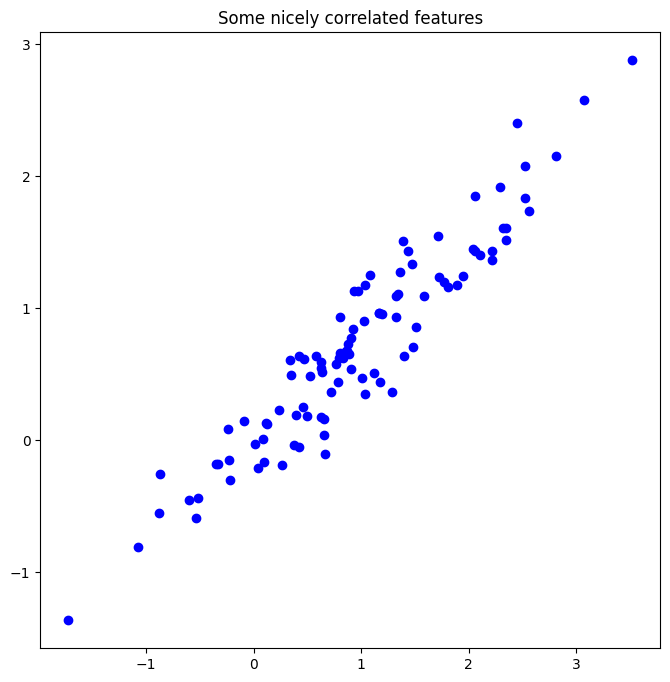

In [152]:
# Feel free to modify those parameters as you wish
Npoints = 100 # number of points
alpha = 0.75 # control the correlation between the two features
beta = 0.25 # control the dispersion of each feature

x0 = 1+np.random.randn(Npoints) # first feature is defined as a gaussian random variable
x1 = alpha*x0+beta*np.random.randn(Npoints)
X = np.vstack((x0,x1)).T
# -------- display the data set --------
def plot_fig(X):
  plt.figure(figsize=(8,8))
  plt.scatter(X[:,0],X[:,1],color='blue')
  plt.title('Some nicely correlated features');
plot_fig(X)

Given a data set $\mathbf{X} \in \mathbb{R}^{n \times N}$ (keep in mind that $n$ is the number of samples and $N$ the dimensionality/number of features), the PCA algorithm is decomposed in the following steps:
1. Center all features by substracting its mean to all features/columns in $\mathbf{X}$ ($\mathbf{X} \rightarrow \mathbf{X_c}$)

1. _(optional)_ Reduce all features by dividing each column by its standard deviation (should be used when it is known that some features may have very different ranges of values)

2. Compute sample covariance matrix $\Sigma = \frac{1}{n-1} \mathbf{X_c}^T \mathbf{X_c}$ ($\Sigma$ must be a $N \times N$ matrix, not $n \times n$)
3. perform the eigendecomposition of $\Sigma$: $\Sigma \rightarrow (\mathbf{E},\boldsymbol \Lambda)$ where $\mathbf{E} = [\mathbf{e}_1,\dots,\mathbf{e}_N]$ is the matrix where each column is an eigenvector and $\boldsymbol \Lambda = \text{diag}(\lambda_1,\dots,\lambda_N)$ is the diagonal matrix containing the eigenvalues (sorted in decreasing order). The spectral theorem tells us that, since $\Sigma$ is a real symmertic matrix, eigenvectors are unitary ($\| \mathbf{e}_i\| = 1\ \forall i$) and orthogonal to each others ($\mathbf{e}_i^T \mathbf{e}_j = 0\ \forall i \neq j$). The order in which the eigenvalues are ranked gives us the preferential directions of projection, directions that are precisely encoded by their corresponding eigenvectors (called **principal components/axes**)
4. The principal components form a new (orthogonal) basis of $\mathbf{R}^N$ (the space where lives the input data set). To get the coordinates of a given data point $\mathbf{x_c}_i$ in this new basis, just use $\mathbf{E}$ as a transition matrix: $\mathbf{z}_i = \mathbf{x_c}_i^T \mathbf{E}$. To get the new coordinates of the whole dataset at once, just compute $\mathbf{Z} = \mathbf{X_c}\mathbf{E}$. If one now wants to reduce the dimension, by keeping only the $M$ leading eigenvectors, the operation is the same, only replacing $\mathbf{E}$ by its truncated version $\mathbf{E}_M = [\mathbf{e}_1,\dots,\mathbf{e}_M]$: $\mathbf{Z}_M = \mathbf{X}\mathbf{E}_M$. $\mathbf{Z}_M$ is now a $n \times M$ matrix (its columns are the $M$ first columns of $\mathbf{Z} = \mathbf{X_c}\mathbf{E}$.

<img src="https://www.researchgate.net/profile/Hoang-Nguyen-65/publication/337244216/figure/fig2/AS:825072486977536@1573724018162/The-principle-component-analysis-PCA-procedure-source.png">

**Question** Implement steps 1, 3 and 4 of PCA algorithm and apply them to the previous 2D data set (no need to normalize the features here since they are in the same range of values)

<u>pro tip</u>: you can use either `np.linalg.eig` or `np.linalg.eigh` to perform the eigendecomposition of a matrix with numpy. The latter is preferred (more efficient + returns sorted eigenvalues) when the input matrix is symmetric, which is the case of a covariance matrix...

In [153]:
def pca_algorithme(X):
  mean = np.mean(X, axis=0)
  Xc = X - mean
  cov = np.cov(Xc.T)
  eig_val, eig_vec = np.linalg.eig(cov)
  #eigen vectors in descending order
  sorted_indices = np.argsort(eig_val)[::-1]
  eig_val = eig_val[sorted_indices]
  eig_vec = eig_vec[:, sorted_indices]
  return Xc, eig_val, eig_vec

**Question** As said above, the principal directions of the data point cloud are provided by the eigenvectors of the covariance matrix, and their respective eigenvalues the relative importance of the direction. The higher the eigenvalue, the more variance we will retain by projecting the data onto the direction spanned by the eigenvector. To convince yourself about that, let's (scatter)plot the centered dataset and draw the directions spanned by the two scaled eigenvectors $\lambda_1\mathbf{e}_1$ and $\lambda_2\mathbf{e}_2$ <br>
The code is given below, you just have to repace `Xc`, `L` and `E` by the names you gave to the centered data matrix, the eigenvalues array and eigenvector matrix obtained in the previous question

(100, 2) (2,) (2, 2)


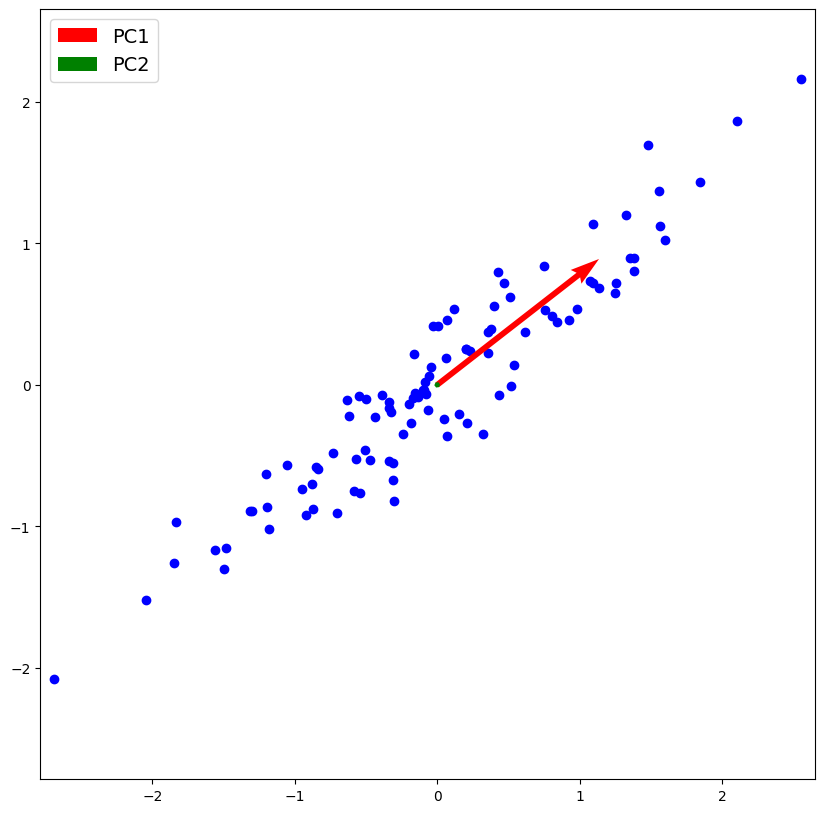

In [154]:
# Replace Xc, L and E by your own variables
Xc, L, E = pca_algorithme(X)
print(Xc.shape, L.shape, E.shape)
plt.figure(figsize=(10,10))
plt.scatter(Xc[:,0],Xc[:,1],color='blue')
plt.quiver(0,0,L[0]*E[0,0],L[0]*E[1,0],angles='xy',units='xy',scale=1,color='red',label=r'PC1')
plt.quiver(0,0,L[1]*E[0,1],L[1]*E[1,1],angles='xy',units='xy',scale=1,color='green',label='PC2')
plt.xlim(Xc.min()-0.1,Xc.max()+0.1)
plt.ylim(Xc.min()-0.1,Xc.max()+0.1)
plt.legend(loc='best',fontsize=14);

**Question** Check numerically that the two obtained eigenvectors are unitary and orthogonal to each other

<u>pro tip</u>: the dot product $\mathbf{x}^T\mathbf{y}$ of two arrays $\mathbf{x}$ and $\mathbf{y}$ can be compactly computed with numpy as `x.T.dot(y)` or `x.T @ Y`. The norm of an array can be obtained with `np.linalg.norm`

In [155]:
# Norm of ei
norm = np.linalg.norm(E, axis=0)
product = E[:,0].T.dot(E[:, 1])
print(norm, product)

[1. 1.] 0.0


**Question** Implement step 5 of the PCA algorithm, that is:
* express the new coordinates $\mathbf{Y}$ of the data set $\mathbf{X_c}$ in the basis spanned by the two eigenvectors: $\mathbf{Y} = \mathbf{X_c} \mathbf{E}$. Project back $\mathbf{Y}$ in the original basis by $\mathbf{Y} \mathbf{E}^{-1} = \mathbf{Y} \mathbf{E}^T$ and check that we indeed get $\mathbf{X_c}$ back.
* project the data set $\mathbf{X_c}$ onto the direction spanned by the first eigenvector $\mathbf{e}_1$: $\mathbf{y} = \mathbf{X_c} \mathbf{e}_1$ and check that it is indeed equivalent to the first column of $\mathbf{Y}$.
* project back $\mathbf{y}$ in the original space (by nulling the second column of $\mathbf{Y}$ before applying the inverse projection) and compare in a scatterplot the obtained projection with the original data

Y shape:  (100, 2)
True


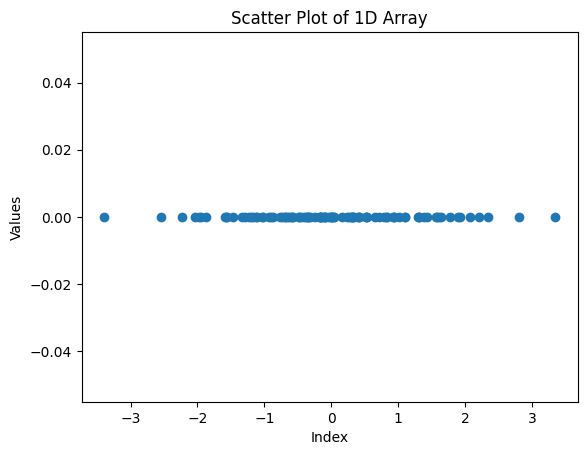

In [156]:
Y = Xc.dot(E)
print("Y shape: ", Y.shape)
e1 = E[:,0]
print(np.allclose(Xc, Y.dot(E.T)))
y1 = Xc.dot(e1)
plt.scatter(y1, np.zeros(len(y1)))
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Scatter Plot of 1D Array')
plt.show()

In [157]:
from sklearn import decomposition

Now we can move on (still on this simple example) with the use of `sklearn.decomposition.PCA` and check that it gives the same results as those obtained by hand. To begin with, go read the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html), and understand what `fit`, `transform`, `fit_transform` and `inverse_transform` methods do, and how they translate into what you have already done in this exercise.

**Question** Check that the various attributes stored in the `PCA` class match with those that you computed by hand before:
* the computed empirical mean with the `mean_` attribute
* the computed empirical covariance matrix with this return by the `get_covariance()` method
* the computed eigenvalues with the `explained_variance_` attribute (in PCA langage, eigenvalue = explained variance)
* the computed eigenvectors with the `components_` attribute
* the computed new coordinates in the eigenvector basis with those returned by the `transform` method

What can you conclude about those comparisons?

<u>pro tip</u>: `np.allclose(x,y)` tells you whether all values of `x` are (component-wise) close to those of `y`

In [158]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
pca.fit(X)
principal_components = pca.transform(X)

cov = np.cov(Xc.T)
cov_pca = pca.get_covariance()
print("mean :", pca.mean_, np.mean(X, axis=0))
print(pca.components_, E)
np.allclose(cov, cov_pca), np.allclose(pca.explained_variance_, L), np.allclose(pca.components_, E) , np.allclose(principal_components, Y)

mean : [0.96376638 0.71206079] [0.96376638 0.71206079]
[[-0.78738512 -0.61646141]
 [ 0.61646141 -0.78738512]] [[ 0.78738512 -0.61646141]
 [ 0.61646141  0.78738512]]


(True, True, False, False)

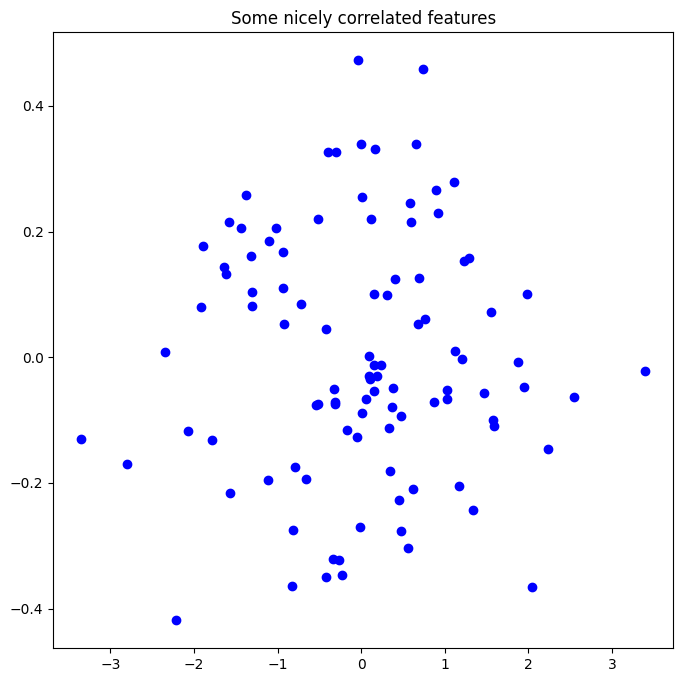

In [159]:
plot_fig(principal_components)

### Exercise 2: PCA in a practical scenario

Let's now work on a more interesting example: a **hyperspectral image** (HSI).<br>
Hyperspectral images are "extensions" of traditional RGB images in the sense that they no longer have 3 channels, but hundreds (or even thousands) of them. To collect them, the electromagnetic spectrum is sampled into several narrow and contiguous bands, and the light collected within each band results in a given channel of the hyperspectral image. At the end of the day, one gets a datacube with $N$ channels, and a pixel "value" $\mathbf{x}$ is no longer a triplet $\mathbf{x} = [x_R, x_G, x_B]$ as it is the case in RGB color image, but a $N$-uplet $\mathbf{x} = [x_1,\dots,x_N] \in \mathbb{R}^N$ where each value $x_i$ corresponds to the amound of light that has been collected in the $i$th band. As each band is associated with a particular wavelength in the electromagnetic spectrum, plotting $\mathbf{x}$ as a function of $i$ gives a _reflectance spectrum,_ in other words, how the light that reaches the sensor has interacted with the matter in the imaged scene. As two different materials (say vegetation and bitumen) do not interact with light the same way, a HSI allows to identify which components are present in the imaged scene. They are widely used in satellite imagery (for Earth observation purposes), astrophysics imagery (check for instance [this](https://www.eso.org/public/france/news/eso1738/) for a kickass application of HSI in astrophysics), and more and more used for medical imaging applications

| ![](https://d3i71xaburhd42.cloudfront.net/683c599323807f468d5b3031d6a3b92cadeec690/2-Figure1-1.png) | ![](https://www.researchgate.net/profile/Michelson-Chan/publication/259361052/figure/fig1/AS:669405616812055@1536610144677/Illustration-of-a-hyperspectral-image-cube.jpg) |
| --- | --- |

In [160]:
import skimage as sk
from skimage import io

In [161]:
hsi = np.load('HSI_WashingtonDC.npy')
hsi = hsi/hsi.max() # normalize radiance values to get reflectance values
row,col,dim = hsi.shape
print('Data cube has %d rows, %d columns and %d bands'%(row,col,dim))
rgb_bands = np.array([43,27,3]) # band 43 = R channel, band 27 = G channel, band 3 = B channel
hsi_rgb = hsi[:,:,rgb_bands] # create a RGB image from datacube for visualization purposes

Data cube has 330 rows, 307 columns and 191 bands


In [162]:
# Don't mind me, I'm just here to pimp a little bit the RGB image
pmin,pmax = np.percentile(hsi_rgb,(1,99),axis=(0,1))
hsi_rgb_pimped = hsi_rgb.copy()
for i in range(pmin.size):
    hsi_rgb_pimped[:,:,i] = (hsi_rgb[:,:,i]-pmin[i])/(pmax[i]-pmin[i])
hsi_rgb_pimped[hsi_rgb_pimped<0] = 0
hsi_rgb_pimped[hsi_rgb_pimped>1] = 1

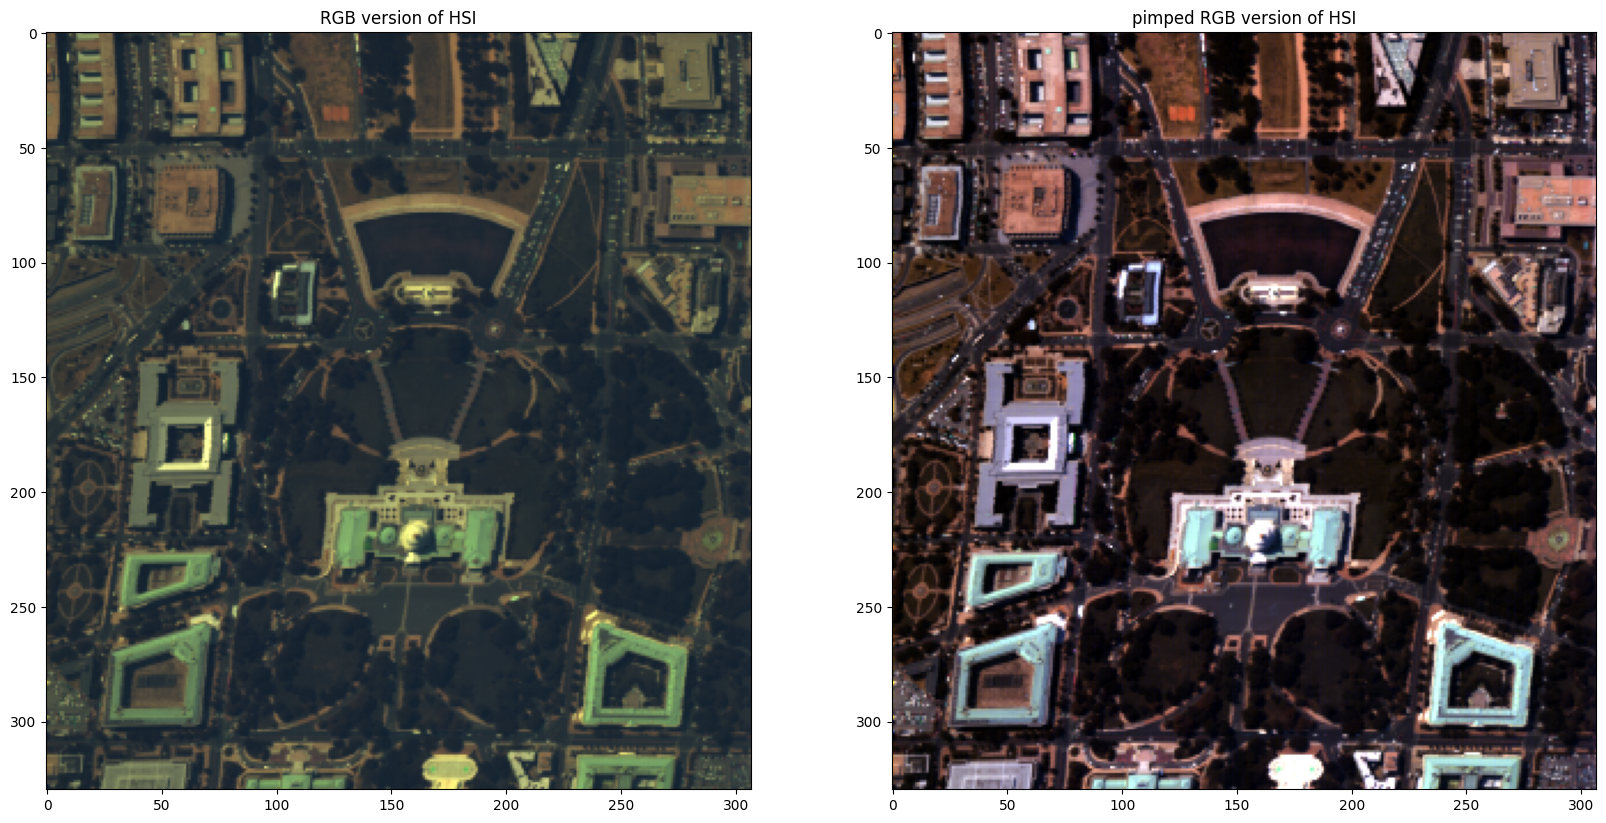

In [163]:
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.title('RGB version of HSI')
plt.imshow(hsi_rgb)
plt.subplot(122)
plt.title('pimped RGB version of HSI')
plt.imshow(hsi_rgb_pimped)
plt.show()

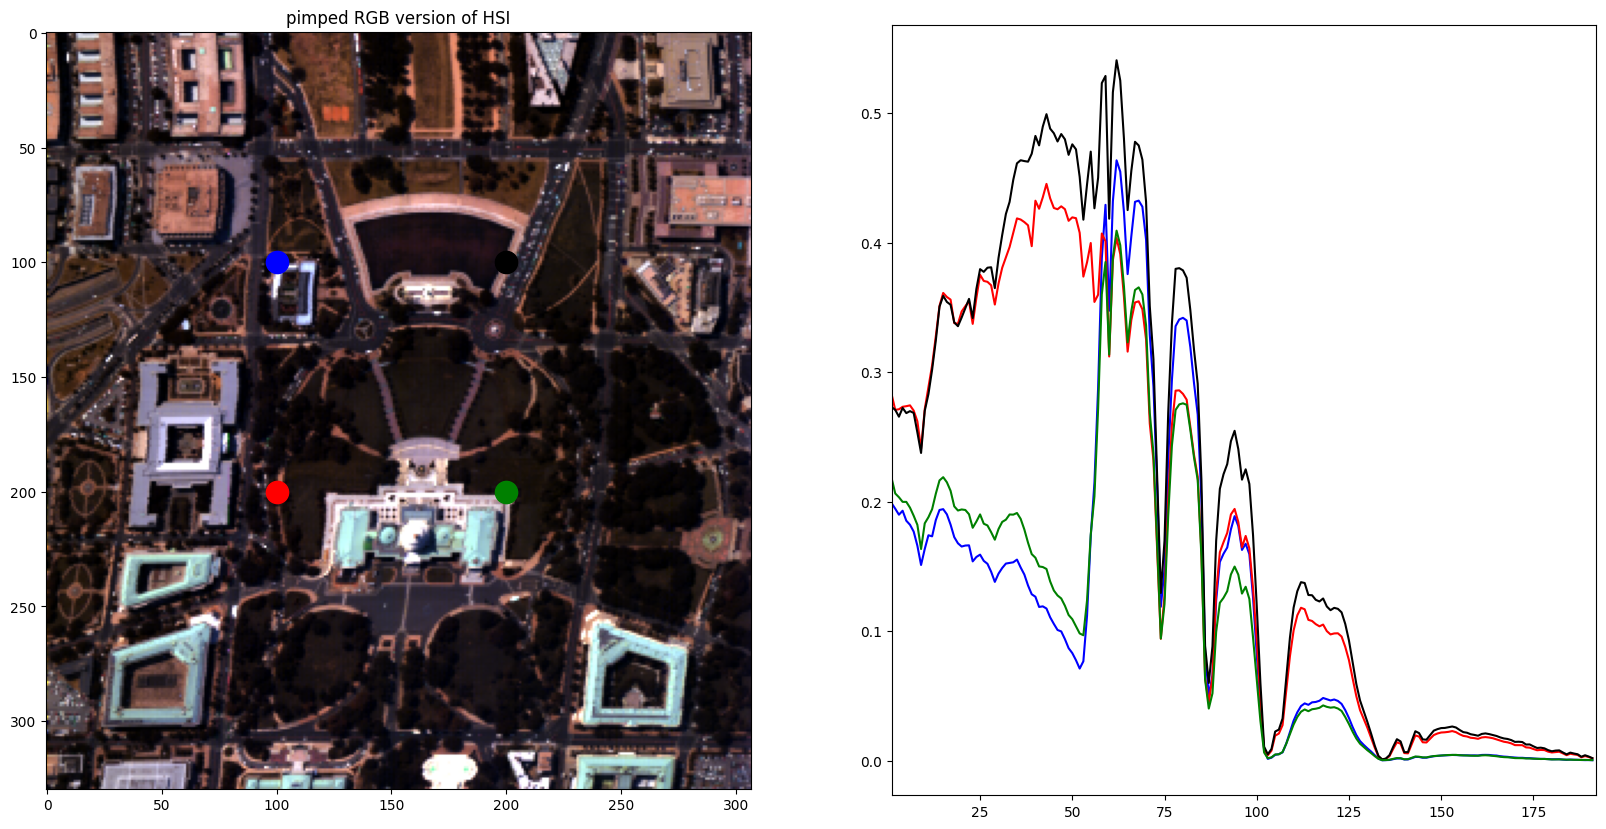

In [164]:
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.title('pimped RGB version of HSI')
plt.imshow(hsi_rgb_pimped)
plt.plot(100,100,'bo',markersize=16)
plt.plot(100,200,'ro',markersize=16)
plt.plot(200,100,'ko',markersize=16)
plt.plot(200,200,'go',markersize=16)
plt.subplot(122)
plt.plot(np.arange(1,dim+1),hsi[100,100,:],'b')
plt.plot(np.arange(1,dim+1),hsi[100,200,:],'r')
plt.plot(np.arange(1,dim+1),hsi[200,100,:],'k')
plt.plot(np.arange(1,dim+1),hsi[200,200,:],'g')
plt.xlim(1,dim+1)
plt.show()

Hyperspectral images have very strong spatial and spectral correlations:
1. Two spatially neighboring pixels are likely to be composed of very similar materials, and so their spectral responses should very much look alike.
2. Two consecutive bands correspond to close wavelenghts in the electromagnetic spectrum. It should be logical that a material response to light at (for example) 500 nm and 510 nm should be rather close (and correlated to each other). So we can expect very strong correlations among the features (the spectral bands) in a HSI, hence a nice playground for the PCA.

**Question** Display side by side two consecutive bands of the given HSI, as well as their difference, and compute their correlation coefficient with `np.corrcoef`. Is it in line with what was expected?

<u>pro tip #1</u>: If you want to _slice_ the data cube $\mathbf{X}$ to extract a particular band/channel (say the channel $k$), you can simply go ahead with `X[:,:,k]`. Similary, if you want to extract the spectral reponse of the pixel located at th ith row and jth column, `X[i,j,:]` will do the job.

<u>pro tip #2</u> If you need to vectorize a matrix $\mathbf{X}$ (or actually, any higher order tensor) into an array, `X.ravel()` is what you are looking for.

In [165]:
np.corrcoef(hsi[:,:,1], hsi[:,:,2]).ravel()

array([1.        , 0.91969713, 0.80224765, ..., 0.89048272, 0.90729195,
       1.        ])

So far, the HSI has been handled as a 3D data cube, with the first 2 dimensions corresponding to the rows and columns of the image, and the third one corresponding to the spectral bands. This 3D tensor is useful for some processing, but not for the PCA which expects a 2D matrix as input. The 3D $n_{row} \times n_{col} \times n_{dim}$ data cube must then be reshaped into a 2D $n_{pix} \times n_{dim}$ matrix, with $n_{pix} = n_{row} \times n_{col}$. <br>
When working with HSIs, it is common to switch from one representation to the other, depending on the processing to apply.

In [166]:
X = hsi.reshape((-1,dim)) # reshaping the HSI as a 2D matrix
X.shape
# Obviously, reshaping it back to a 3D data cube would be written as X.reshape((row,col,dim))

(101310, 191)

**Question** We can expect the data to be strongly correlated, let's have a look to which extent. Compute the covariance matrix by hand (as you did in exercise 2) and with `np.cov`, and check that they give the same result. Display this covariance matrix as an image (using `plt.imshow`). What can you conclude?

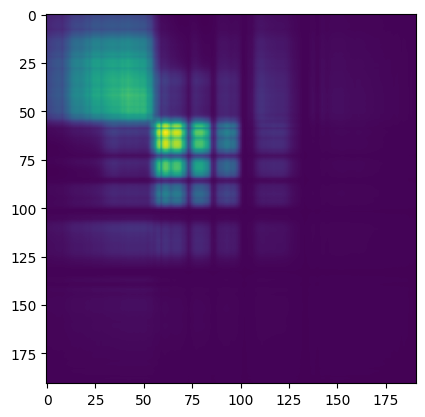

In [167]:
cov = np.cov(X.T)
plt.imshow(cov)

The covariance matrix is a nice way to get an insight on how the various variables/features are correlated, but the covariance values depend on the range of values of the variables. Here, the various bands have quite different ranges of values (compare the values in the last bands to those in the first bands of the spectra displayed above), so it is quite hard to interpret the various covariance values with eath other. A better idea is to look at the correlation matrix (basically, a normalized version on the covariance matrix).

**Question** Compute the correlation matrix with `np.corrcoef` and dislay it. What can you conclude this time?

In [168]:
np.corrcoef(cov[:,-1], cov[:,0])

array([[1.        , 0.97415074],
       [0.97415074, 1.        ]])

**Question** Let's now perform a PCA on the matrix version of the HSI, and have a look to the variance of the different principal axes. So:
* perform the PCA of $\mathbf{X}$ (you are now allowed to only use the built-in function of sklearn)
* plot the explained variance and the explained variance ratio (a log scale in the y-axis may help here). A crude rule of thumb to select the number of dimensions to project the data is to take the M eigenvectors whose explained variance is notably higher than all the other. How many dimensions would you keep accoring to this (again, very crude) rule of thumb?

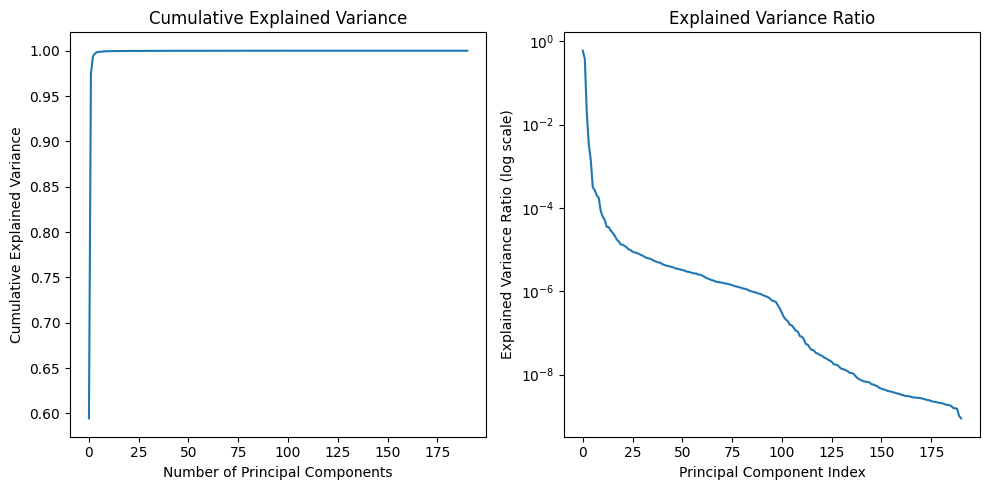

In [178]:
pca = PCA()
principal_components = pca.fit_transform(X)
# Plot explained variance and explained variance ratio
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')

plt.subplot(1, 2, 2)
plt.plot(pca.explained_variance_ratio_)
plt.yscale('log')
plt.xlabel('Principal Component Index')
plt.ylabel('Explained Variance Ratio (log scale)')
plt.title('Explained Variance Ratio')

plt.tight_layout()
plt.show()

The most commonly used strategy to select how many dimensions to keep is to reason in terms of percentage of total explained variance. For instance, if one wants to keep 90% of the total variance $\text{var}_{\text{tot}}$ of the data set (with $\text{var}_{\text{tot}} = \displaystyle \sum_{i=1}^N \lambda_i$ being the sum of all individual explained variances, hence the sum of all eigenvalues, hence (again) the trace of the covariance matrix $\text{tr}(\Sigma)$), then the number $M$ of dimensions to retain is such that $\displaystyle \frac{1}{\text{var}_{\text{tot}}} \displaystyle \sum_{i=1}^{M} \lambda_i \geq 90\%$ and $\displaystyle \frac{1}{\text{var}_{\text{tot}}} \displaystyle \sum_{i=1}^{M-1} \lambda_i < 90\%$. In other words, $M$ is the minimal number of dimensions such that the (partial) sum of their explained variance exceeds 90% of the total variance.

**Question** Using the `explained_variance_ratio_` attribute and the `np.cumsum()` function, write your own function that returns the minimal number of dimensions to retain to reach a given percentage of the total variance. How many dimensions are necessary in that case to reach 90%, 99%, 99.9% and 99.99% of the total variance?<br>
Note that, in general we are more than happy to retain 90% or 95% of the total variance of a given data set...

In [185]:
# Determine the number of dimensions to keep
cumulative_var_threshold = 0.90
num_dimensions_to_keep = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= cumulative_var_threshold) + 1

print(f"Number of dimensions to keep: {num_dimensions_to_keep}")

Number of dimensions to keep: 2


**Question** Project the data onto the first $M$ principal components, and reshape this projection back into a $n_{row} \times n_{col} \times M$ data cube. Then visualize, those $M$ new bands.

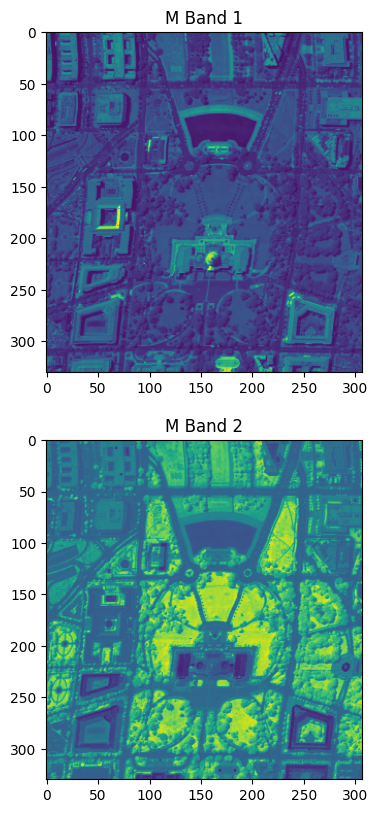

In [202]:
# Project data onto the first M principal components
projected_data = np.dot(X, pca.components_[:num_dimensions_to_keep, :].T)

# Reshape the projected data back into a 3D data cube
reshaped_data_cube = projected_data.reshape(hsi.shape[0], hsi.shape[1], num_dimensions_to_keep)

# Visualize the original PCA bands and the new reshaped bands side by side
plt.figure(figsize=(15, 5 * (num_dimensions_to_keep + 1)))

# Plot reshaped bands
for i in range(num_dimensions_to_keep):
    plt.subplot(num_dimensions_to_keep + 1, 2, 2 * i + 2)
    plt.imshow(reshaped_data_cube[:, :, i], cmap='viridis')  # You can change the colormap if needed
    plt.title(f'M Band {i + 1}')

plt.show()

If everything went smoothly in the previous question, you should have noticed that the level of details goes down when you look the projection on "higher order" principal components, and so does the dynamical range. This is a well known property of PCA: it isolates the signal in the first principal components, leaving only the noise in the last ones.

**Question** Plot the min and max values as well as the standard deviation of all projected bands

(2,) (2,) (2,)


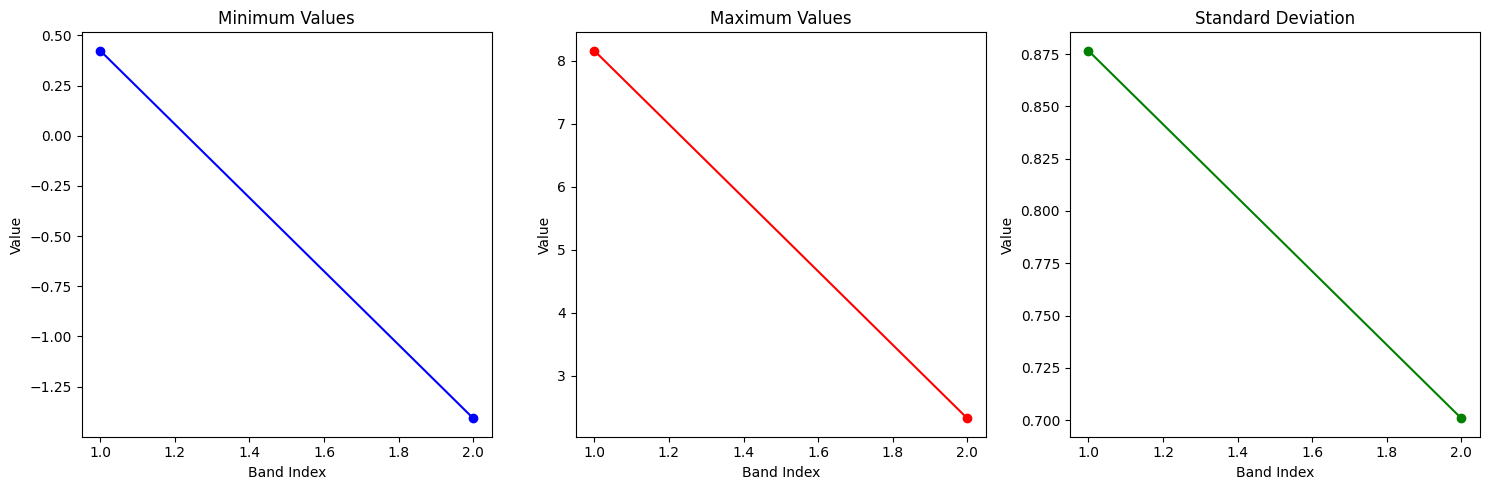

In [204]:
# Calculate min, max, and standard deviation for each band
min_values = np.min(reshaped_data_cube, axis=(0, 1))
max_values = np.max(reshaped_data_cube, axis=(0, 1))
std_deviation = np.std(reshaped_data_cube, axis=(0, 1))
print(min_values.shape, max_values.shape, std_deviation.shape)

# Visualize min, max, and standard deviation
plt.figure(figsize=(15, 5))

# Plot min values
plt.subplot(1, 3, 1)
plt.plot(np.arange(1, num_dimensions_to_keep + 1), min_values, 'bo-')
plt.title('Minimum Values')
plt.xlabel('Band Index')
plt.ylabel('Value')

# Plot max values
plt.subplot(1, 3, 2)
plt.plot(np.arange(1, num_dimensions_to_keep + 1), max_values, 'ro-')
plt.title('Maximum Values')
plt.xlabel('Band Index')
plt.ylabel('Value')

# Plot standard deviation
plt.subplot(1, 3, 3)
plt.plot(np.arange(1, num_dimensions_to_keep + 1), std_deviation, 'go-')
plt.title('Standard Deviation')
plt.xlabel('Band Index')
plt.ylabel('Value')

plt.tight_layout()
plt.show()

**Question** Another fundamental property of the PCA is that all projected features are uncorrelated to each other. Check that correlation matrix of the projected data is equal to the identity matrix

In [207]:
np.corrcoef(projected_data, rowvar=False)

array([[ 1.00000000e+00, -5.09375351e-16],
       [-5.09375351e-16,  1.00000000e+00]])

Let's now have a look to the amount of information that is lost when we project the data onto the first $M$ principal components and project back the result into the original space (pretty much like you did in exercise 2 when you projected the data onto the first principal axis and projected it back in its original space)<br>

**Question** Project the data onto the $M$ first principal axes to retain (say) 99.9% of the total variance, project the result back into the original space with the `inverse_transform` method, and reshape it into a $n_{row} \times n_{col} \times n_{dim}$ data cube. Then select the RGB bands (defined at the beginning of this exercise) from it and display the resulting RGB image along with the original one. Can you see some differences?

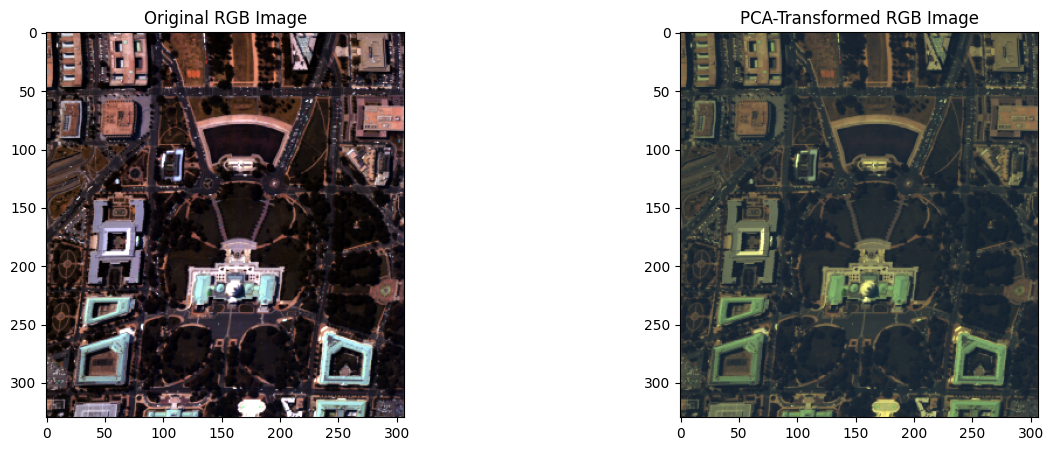

In [213]:
pca = PCA(n_components=0.999)
data_pca = pca.fit_transform(X)

projected_data = pca.inverse_transform(data_pca)

# Reshape into a 3D data cube
reshaped_data_cube = projected_data.reshape(hsi.shape)

# Select RGB bands
rgb_image_pca = reshaped_data_cube[:, :, rgb_bands]

# Visualize the RGB images
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.imshow(hsi_rgb_pimped)
plt.title('Original RGB Image')

plt.subplot(1, 2, 2)
plt.imshow(rgb_image_pca)
plt.title('PCA-Transformed RGB Image')

plt.show()


In order to quantify the loss of information, one can compute the MSE (Mean Square Error) between the original HSI (in its matrix form) $\mathbf{X}$ and the $\mathbf{\tilde{X}}$ resulting from the projection onto the first $M$ principal components and then projection back in the original space (which would be written as $\mathbf{\tilde{X}} = (\mathbf{X}\mathbf{E}_M)\mathbf{E}^T$ where $\mathbf{E}_M = [\mathbf{e}_1,\dots,\mathbf{e}_M,\mathbf{0},\dots,\mathbf{0}]$)<br>
The MSE is given by $$\text{MSE}(\mathbf{\tilde{X}},\mathbf{X}) = \frac{1}{n_{pix}}\sum_{i=1}^{n_{pix}} \| \mathbf{x}_i - \mathbf{\tilde{x}}_i \|_2^2$$ where $\mathbf{x}_i$ and $\mathbf{\tilde{x}}_i$ are the $i$th row of $\mathbf{X}$ and $\mathbf{\tilde{X}}$, respectively

**Question** (bonus) Compute the MSE between the original HSI image and the one obtained when retaining only the first $M$ principal components before projecting back<br>

In [216]:
from sklearn.metrics import mean_squared_error
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(X, reshaped_data_cube.reshape(-1, hsi.shape[-1]))

print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 5.695912066382695e-06


### Exercise 3: projecting new data into learned subspace

Frequently in a machine learning framework, one wants to learn a transformation (dimensionality reduction for instance) on a given data set (the training set) and apply it on another data set (the test set). But one has to make sure that the test data can be consistently projected with the transformation learned on the training data.

Mathematically, we hope that if $\mathcal{F}$ is the transformation that has been learned on the training data $\mathbf{X} = [\mathbf{x}_1,\dots,\mathbf{x}_n]$ and $\mathbf{x} \not\in \mathbf{X}$ is a test point, then its projection $\mathcal{F}(\mathbf{x})$ won't be too different than the one we would have obtained if $\mathbf{x}$ was initially in the training set (thus contributing to the learning of $\mathcal{F}$)

The goal of this exercise is to investigate this question: let's learn the transformation (through the matrix $\mathbf{E}_{ref}$) once onto the whole data set $\mathbf{X}$ and then only onto a subset of it $\mathbf{X}_{train}$ (with the transformation matrix $\mathbf{E}_{train}$). Let's project the other subset $\mathbf{X}_{test}$ with the transformation $\mathbf{E}_{train}$ learned on $\mathbf{X}_{train}$ and compare the projection with respect to $\mathbf{E}_{ref}$.

In [217]:
# At this point in the lab, you should be confortable with the following lines so no need to write them again
X = hsi.reshape((-1,dim))
pca_ref = sklearn.decomposition.PCA(n_components=2) # we are going to use scatterplots so let's project on 2D
Xproj_ref = pca_ref.fit_transform(X) # reference projection -> done on the whole data set X

Splitting the whole data set $\mathbf{X}$ into a training set and a test set can be conveniently done using the `train_test_split` function from `sklearn.model_selection`

In [218]:
from sklearn import model_selection

**Question** Summing up, what you have to do here:
* learning a PCA transformation $\mathbf{E}_{ref}$ over the whole data set $\mathbf{X}$ (retaining only the first 2 principal components)
* learning a PCA transformation $\mathbf{E}_{train}$ over a subset $\mathbf{X}_{train}$ of $\mathbf{X}$
* projecting $\mathbf{X}_{test}$ once with $\mathbf{E}_{ref}$ and once with $\mathbf{E}_{train}$, and comparing the result (for instance with a scatterplot of the difference of the two projections)

In [221]:
# Splitting the whole data set 𝐗 into a training set and a test set
X_train, X_test = model_selection.train_test_split(X, test_size=0.2, random_state=42)

# Learning a PCA transformation 𝐄𝑡𝑟𝑎𝑖𝑛 over a subset 𝐗𝑡𝑟𝑎𝑖𝑛 of 𝐗
pca_train = sklearn.decomposition.PCA(n_components=2)
X_proj_train = pca_train.fit_transform(X_train)

# Projecting 𝐗𝑡𝑒𝑠𝑡 once with 𝐄𝑟𝑒𝑓
X_proj_test_ref = pca_ref.transform(X_test)

# Projecting 𝐗𝑡𝑒𝑠𝑡 once with 𝐄𝑡𝑟𝑎𝑖𝑛
X_proj_test_train = pca_train.transform(X_test)

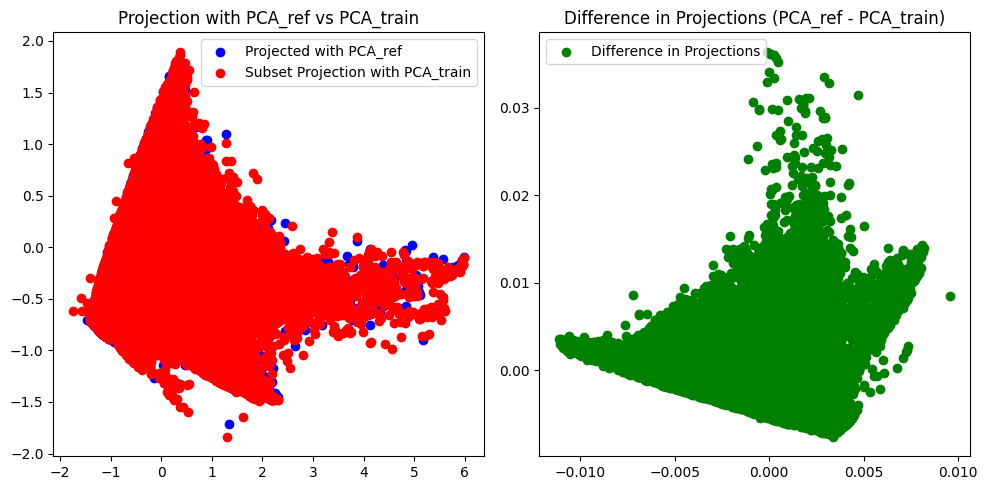

In [222]:
# Comparing the result with a scatterplot of the difference of the two projections
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_proj_test_ref[:, 0], X_proj_test_ref[:, 1], c='blue', label='Projected with PCA_ref')
plt.scatter(X_proj_train[:, 0], X_proj_train[:, 1], c='red', label='Subset Projection with PCA_train')
plt.title('Projection with PCA_ref vs PCA_train')
plt.legend()

plt.subplot(1, 2, 2)
difference = X_proj_test_ref - X_proj_test_train
plt.scatter(difference[:, 0], difference[:, 1], c='green', label='Difference in Projections')
plt.title('Difference in Projections (PCA_ref - PCA_train)')
plt.legend()

plt.tight_layout()
plt.show()